# Analyzing correspondence networks with CorrNet

## Importing the package

In [1]:
import corrnet
from IPython.display import display
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu

## Loading and inspecting the correspondence data

### Loading the data

In [2]:
letter_manager = corrnet.LetterManager('data/letter_data.csv', date_col='Date',
                                       sender_col='Sender', addressee_col='Receiver',
                                       attribute_cols=['Written for', 'Institution', 'Recommendation Type'])

In [63]:
senders_succ = []
senders_no_succ = []
receiver_succ = []
receiver_no_succ = []
subjects_succ = []
subjects_no_succ = []
for i in range(letter_manager._letter_data.shape[0]):
    if letter_manager._letter_data.loc[i, letter_manager._provenance_col] == 'Hebrew Uni Abgelehnt':
        senders_no_succ.append(letter_manager._letter_data.loc[i, letter_manager._sender_col])
        subjects_no_succ.append(letter_manager._letter_data.loc[i, letter_manager._subject_col])
        receiver_no_succ.append(letter_manager._letter_data.loc[i, letter_manager._addressee_col])
    elif letter_manager._letter_data.loc[i, letter_manager._provenance_col] == 'Hebrew University':
        senders_succ.append(letter_manager._letter_data.loc[i, letter_manager._sender_col])
        subjects_succ.append(letter_manager._letter_data.loc[i, letter_manager._subject_col])
        receiver_succ.append(letter_manager._letter_data.loc[i, letter_manager._addressee_col])

In [38]:
set(subjects_succ).intersection(set(subjects_no_succ))

{'Kolthoff Izaak Maurits', 'Wolfsohn Günther'}

In [3]:
letter_manager._letter_data.query('`Written for` in ["Kolthoff Izaak Maurits","Wolfsohn Günther"]')

,index,Institution,Written for,Sender,Receiver,Date,Recommendation Type
155,158,Hebrew Uni Abgelehnt,Kolthoff Izaak Maurits,Ginzberg,Ornstein Leonard Salomon,1927-11-02,Z
156,159,Hebrew University,Kolthoff Izaak Maurits,Ginzberg,Ornstein Leonard Salomon,1927-11-02,Z
157,160,Hebrew University,Kolthoff Izaak Maurits,Ginzberg,Ornstein Leonard Salomon,1927-11-02,Z
349,352,Hebrew Uni Abgelehnt,Wolfsohn Günther,Ornstein Leonard Salomon,Magnes Judah Leon,1933-09-06,X
350,353,Hebrew Uni Abgelehnt,Wolfsohn Günther,Ornstein Leonard Salomon,Magnes Judah Leon,1933-09-06,X
351,354,Hebrew Uni Abgelehnt,Wolfsohn Günther,Ornstein Leonard Salomon,Magnes Judah Leon,1933-09-06,X
440,443,Hebrew University,Wolfsohn Günther,Ornstein Leonard Salomon,Wolfsohn Günther,1934-01-04,X
467,470,Hebrew University,Wolfsohn Günther,Zemansky Mark,Magnes Judah Leon,1934-05-11,X
479,482,Hebrew University,Wolfsohn Günther,Ornstein Leonard Salomon,Magnes Judah Leon,1934-08-20,Y


In [17]:
digraph, multi_digraph = letter_manager.to_graph(earliest_date='1918-01-01', latest_date='1945-05-08')
pageranks = corrnet.compute_centrality(digraph,centrality='pagerank')

In [4]:
senders_succ = set()
senders_no_succ = set()
receiver_succ = set()
receiver_no_succ = set()
for edge in multi_digraph.edges(data=True):
    if edge[2]['Institution'] == 'Hebrew University':
        senders_succ.add(edge[0])
        receiver_succ.add(edge[1])
    elif edge[2]['Institution'] == 'Hebrew Uni Abgelehnt':
        senders_no_succ.add(edge[0])
        receiver_no_succ.add(edge[1])

In [18]:
pagerank_type = 'original'
all_pageranks = []
pageranks_succ = []
pageranks_no_succ = []
status = []
for node in senders_succ:
    try:
        all_pageranks.append(pageranks[pagerank_type]['centralities'][node])
        pageranks_succ.append(pageranks[pagerank_type]['centralities'][node])
        status.append('Successful')
    except KeyError:
        continue
for node in senders_no_succ:
    try:
        all_pageranks.append(pageranks[pagerank_type]['centralities'][node])
        pageranks_no_succ.append(pageranks[pagerank_type]['centralities'][node])
        status.append('Not successful')
    except KeyError:
        continue
df = pd.DataFrame(data={f'PageRank ({pagerank_type})': all_pageranks, 'Status': status})

<AxesSubplot:xlabel='Status', ylabel='PageRank (original)'>

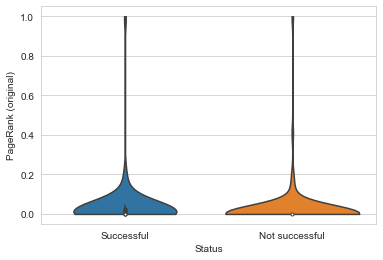

In [9]:
sns.violinplot(data=df, y=f'PageRank ({pagerank_type})', x='Status', cut=0)

In [10]:
mannwhitneyu(pageranks_succ,pageranks_no_succ)

MannwhitneyuResult(statistic=4486.0, pvalue=0.00026119111065992087)

In [21]:
pagerank_type = 'original'
all_pageranks = []
pageranks_succ = []
pageranks_no_succ = []
status = []
for node in receiver_succ:
    try:
        all_pageranks.append(pageranks[pagerank_type]['centralities'][node])
        pageranks_succ.append(pageranks[pagerank_type]['centralities'][node])
        status.append('Successful')
    except KeyError:
        continue
for node in receiver_no_succ:
    try:
        all_pageranks.append(pageranks[pagerank_type]['centralities'][node])
        pageranks_no_succ.append(pageranks[pagerank_type]['centralities'][node])
        status.append('Not successful')
    except KeyError:
        continue
df = pd.DataFrame(data={f'PageRank ({pagerank_type})': all_pageranks, 'Status': status})

<AxesSubplot:xlabel='Status', ylabel='PageRank (original)'>

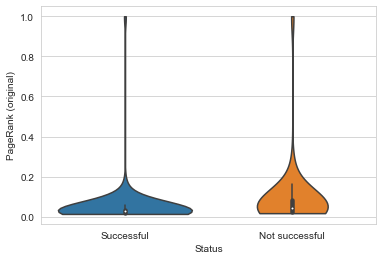

In [22]:
sns.violinplot(data=df, y=f'PageRank ({pagerank_type})', x='Status', cut=0)

In [23]:
mannwhitneyu(pageranks_succ,pageranks_no_succ)

MannwhitneyuResult(statistic=855.0, pvalue=0.00019396137102072077)

### Check if there are letters with bad dates

In [3]:
bad_letter_data = letter_manager.bad_letter_data()
display(bad_letter_data)

,Institution,Written for,Sender,Receiver,Date,Recommendation Type
0,American Friends Service Committee,Frankel Edgar,Marx F. A.,Frankel Edgar,NaN,I
1,American Friends Service Committee,Barschak Erna,Salomon Alice,Barschak Erna,NaN,X
53,Bleichroeder,Klaess Leopold,Swaine Leopold Victor,Bleichroeder (Firma),1883-28,X


### Display earlierst and latest date

In [4]:
print(f'Earliest date: {letter_manager.earliest_date()}.')
print(f'Latest date: {letter_manager.latest_date()}.')

Earliest date: 1839-11-17 00:00:00.
Latest date: 1946-05-24 00:00:00.


### Plot the date distribution
#### a) Aggregated over all letters

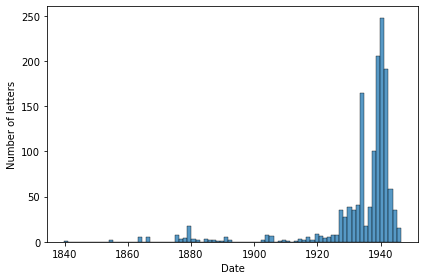

In [5]:
letter_manager.plot_date_distribution(save_as='date_distr.pdf')

#### b) Seperated by letter type

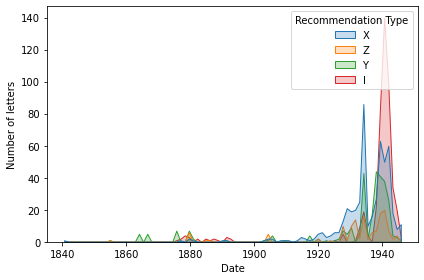

In [6]:
letter_manager.plot_date_distribution(by_type=True)

## Carrying out network analyses
### Generated directed graph from letter data

In [4]:
g = letter_manager.to_digraph(earliest_date='1933-01-30', latest_date='1945-05-08', subjects_as_nodes=False)

### Plot the in- and out-neighbors of a selected node.

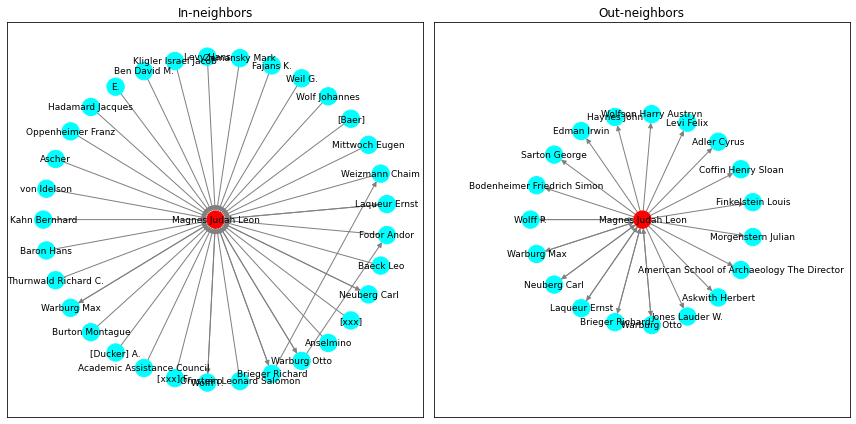

In [7]:
node = 'Magnes Judah Leon'
corrnet.plot_neighborhood(g, node, margins=(None, .35))

### Plot degree distributions

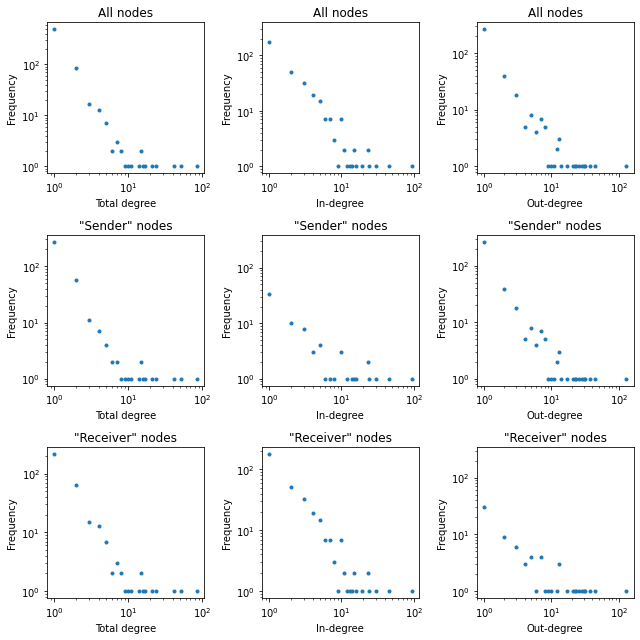

In [12]:
corrnet.plot_degree_distributions(g, save_as='degrees.pdf', use_weights=True, loglog=True)

### Compute Pagerank centralities

In [13]:
pageranks = corrnet.compute_pagerank(g, k=10)

### Display most important receiver nodes

In [15]:
print('Most important receiver nodes:')
for i, t in enumerate(pageranks['original']['top_10']):
    print(f'{i+1}. {t[0]}')

Most important receiver nodes:
1. Magnes Judah Leon
2. Hambly Hanstein Kathleen
3. Krauss Hertha
4. Brieger Richard
5. AFSC Organisation
6. Fuson Nelson
7. Senator David Werner
8. Rogers Mary M.
9. Schwabach Paul Julius von
10. Hessberg Richard


### Display most important sender nodes

In [16]:
print('Most important sender nodes:')
for i, t in enumerate(pageranks['reversed']['top_10']):
    print(f'{i+1}. {t[0]}')

Most important sender nodes:
1. Hambly Hanstein Kathleen
2. Krauss Hertha
3. Salmon Charlotte S.
4. Schwabach Paul Julius von
5. Magnes Judah Leon
6. Cope Alice
7. Schauffler Marjorie Page
8. Timbres Rebecca
9. Rogers Mary M.
10. Montague Harriet


## Carry out temporal analyses
### Compute network and node properties for directed graphs constructed over sliding windows

In [21]:
temporal_data = corrnet.temporal_analysis(letter_manager, earliest_date='1920-01-01', window_size='3 y', latest_date=None, step_width='2 y', subjects_as_nodes=False)

In [19]:
temporal_data

,window_start,window_end,node_preservation,edge_preservation,node_novelty,edge_novelty,node_congruence,edge_congruence,num_nodes,num_edges,...,pagerank_reversed_Kingsley Robert A.,pagerank_reversed_Skoss Solomon L.,pagerank_reversed_Mayer L.A.,pagerank_reversed_Charp S.,pagerank_reversed_Della Vida G. Levi,pagerank_reversed_Walton George,pagerank_reversed_Hartog Philip,pagerank_reversed_Rosen,pagerank_reversed_Hadi Abdul,pagerank_reversed_Washburn Arthur H.
0,1920-01-01,1923-01-01,NaN,NaN,NaN,NaN,NaN,NaN,17,10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1920-03-01,1923-03-01,1.000000,1.000000,0.150000,0.166667,0.850000,0.833333,20,12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1920-05-01,1923-05-01,1.000000,1.000000,0.090909,0.076923,0.909091,0.923077,22,13,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1920-07-01,1923-07-01,0.954545,0.923077,0.000000,0.000000,0.954545,0.923077,21,12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1920-09-01,1923-09-01,0.904762,0.916667,0.000000,0.000000,0.904762,0.916667,19,11,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1942-11-01,1945-11-01,0.923077,0.938776,0.000000,0.021277,0.923077,0.920000,60,47,...,0.135700,0.088937,0.073349,0.215023,0.120112,0.073349,0.073349,0.073349,0.073349,0.000000
138,1943-01-01,1946-01-01,0.950000,0.936170,0.000000,0.000000,0.950000,0.936170,57,44,...,0.147839,0.096895,0.079914,0.221582,0.130858,0.079914,0.079914,0.079914,0.079914,0.000000
139,1943-03-01,1946-03-01,0.929825,0.931818,0.000000,0.000000,0.929825,0.931818,53,41,...,0.180062,0.118012,0.097329,0.238985,0.159379,0.097329,0.097329,0.097329,0.097329,0.000000
140,1943-05-01,1946-05-01,0.962264,0.975610,0.000000,0.000000,0.962264,0.975610,51,40,...,0.180062,0.118014,0.097331,0.239001,0.159379,0.097331,0.097331,0.097331,0.097331,0.000000


### Plot the network dynamics (node and edge changes)

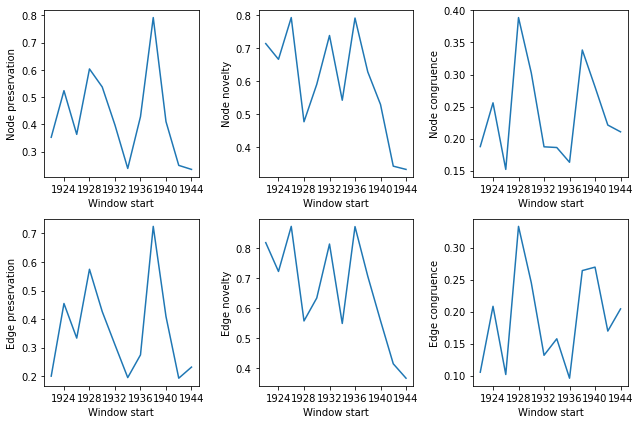

In [22]:
corrnet.plot_network_dynamics(temporal_data)

### Plot network properties over time

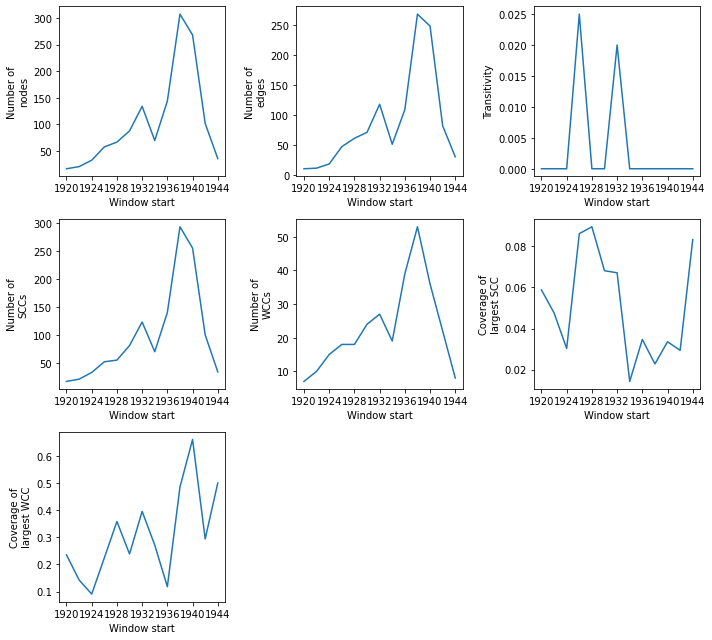

In [23]:
corrnet.plot_network_properties(temporal_data, figsize=(10,9))

### Plot Pagerank centralities of selected nodes over time

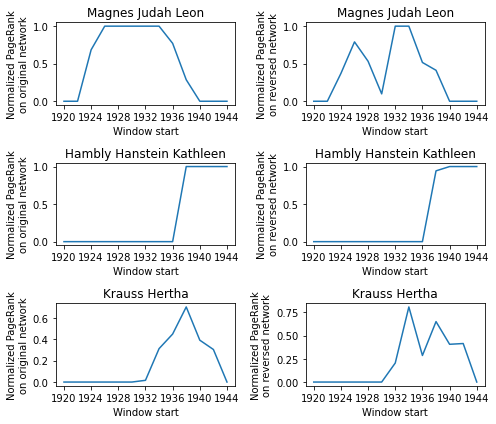

In [25]:
corrnet.plot_pagerank(temporal_data, nodes=['Magnes Judah Leon', 'Hambly Hanstein Kathleen', 'Krauss Hertha'], figsize=(7,6), save_as='pageranks.png')